# TODO: Classification model instead

In [1]:
import utils
import cv2
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.metrics import log_loss

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
model_name = 'score_model_3'

In [3]:
conn = utils.get_conn()

In [4]:
sql = """
INSERT INTO scores (file, score, user, time) 
VALUES ('2018-06-10T17-24-20.245043.jpg', 0, 'test', current_time());
"""
conn.execute(sql)

In [5]:
# pd.read_sql('ALTER TABLE scores ADD COLUMN (time DATETIME)', conn)

In [6]:
pd.read_sql("SELECT * FROM scores where user IS NOT NULL", conn)

,file,score,user,time
0,2018-06-10T17-24-20.245043.jpg,0,test,2019-06-02 20:41:05
1,2018-06-10T17-24-20.245043.jpg,0,test,2019-06-02 20:42:15
2,2019-06-01T14:12:12.jpg,1,35833581,2019-06-02 20:53:02
3,2019-06-01T08:53:15.jpg,3,35833581,2019-06-02 20:54:01
4,2019-06-01T13:05:45.jpg,2,35833581,2019-06-02 20:54:09
5,2019-06-01T14:17:53.jpg,0,35833581,2019-06-02 20:54:14
6,2019-06-01T09:11:06.jpg,3,35833581,2019-06-02 20:54:24
7,2019-06-01T14:26:26.jpg,1,35833581,2019-06-02 20:54:30
8,2019-06-01T08:46:49.jpg,9,35833581,2019-06-02 20:56:11
9,2019-06-01T14:28:36.jpg,4,35833581,2019-06-02 20:56:19


In [7]:
sql = """
SELECT 
    a.file,
    AVG(score) as score,    
    b.model
FROM scores a
INNER JOIN processed b
    ON a.file = b.file
GROUP BY
    a.file,
    b.model
"""
df = pd.read_sql(sql, conn)

In [8]:
train, test = train_test_split(df)
train = train.copy()
test = test.copy()
train.index.size, test.index.size

(1259, 420)

In [9]:
def get_representations(df):
    files_as_df = []
    for ind, row in df.iterrows():
        try:
            data = pd.read_csv('data/{}/{}.csv'.format(row['model'], row['file']), header=None)
            data['score'] = row['score']
            files_as_df.append(data)
        except:
            print('error with file', row['file'])
            data['score'] = np.nan
            files_as_df.append(data)
    return pd.concat(files_as_df)

In [10]:
%%time
test_representations = get_representations(test)
len(test_representations)

CPU times: user 2min 16s, sys: 730 ms, total: 2min 17s
Wall time: 2min 19s


In [11]:
%%time
train_representations = get_representations(train)
len(train_representations)

error with file 2019-06-01T08:01:43.jpg
CPU times: user 6min 53s, sys: 1.86 s, total: 6min 55s
Wall time: 6min 57s


In [12]:
train_representations = train_representations.fillna(0)
train_representations.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,1000,score
0,2018-06-10T17-01-27.706835.jpg,0.000072,0.000897,0.001124,0.000088,0.000019,0.000599,0.000168,4.386722e-06,6.968276e-06,...,9.761266e-06,1.364868e-05,2.925191e-07,5.709797e-06,4.529849e-06,3.499143e-05,0.000006,1.759436e-05,7.082677e-04,8.0
0,2018-09-24T11-51-05.072150.jpg,0.000034,0.000005,0.147333,0.016620,0.012831,0.000206,0.013404,8.229878e-07,2.519864e-07,...,1.604513e-06,1.777290e-05,2.378223e-06,1.693497e-05,2.016967e-06,1.225110e-06,0.000097,3.455323e-07,2.732552e-05,0.0
0,2019-06-01T09:04:19.jpg,0.000014,0.000252,0.007035,0.001295,0.001999,0.013498,0.002117,9.763726e-09,9.178262e-09,...,5.772980e-08,7.736703e-07,3.570079e-07,1.090204e-07,1.197608e-07,2.506199e-08,0.000070,6.137168e-07,7.138085e-07,1.0
0,2018-06-10T17-13-56.523407.jpg,0.000082,0.001486,0.000494,0.000057,0.000047,0.000304,0.000175,3.068406e-06,7.144675e-06,...,7.150268e-05,3.020896e-04,1.483366e-06,1.699251e-05,1.184271e-04,1.862303e-05,0.000055,5.479050e-04,2.275542e-04,0.0
0,2018-06-10T17-16-09.946784.jpg,0.000051,0.003840,0.002237,0.000101,0.000131,0.000309,0.000517,7.307522e-06,9.770123e-07,...,4.140045e-05,4.432480e-04,2.858071e-07,5.875848e-06,1.350121e-05,3.453561e-06,0.000006,2.553576e-03,6.879571e-05,0.0


In [33]:
from sklearn.ensemble import GradientBoostingRegressor

/home/pi/berryconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [34]:
%%time

features = np.arange(1,1001)
# model = linear_model.LinearRegression()
model = GradientBoostingRegressor()

model.fit(train_representations[features], train_representations['score'])

CPU times: user 1min, sys: 79.9 ms, total: 1min
Wall time: 1min


In [35]:
model.predict(train_representations[features])

array([ 0.8351869 ,  0.12683321, -0.0059377 , ..., -0.01379233,
        0.01390093,  1.98443493])

In [36]:
# Get predictions and probabilities
train['pred'] = model.predict(train_representations[features])
test['pred'] = model.predict(test_representations[features])

#train['proba'] = model.predict_proba(train_representations[features])[:,1]
#test['proba'] = model.predict_proba(test_representations[features])[:,1]

In [37]:
# train_acc = (train['pred'] == train['is_good']).mean()
# test_acc = (test['pred'] == test['is_good']).mean()

# train_loss = log_loss(train['is_good'], model.predict_proba(train_representations[features]))
# test_loss = log_loss(test['is_good'], model.predict_proba(test_representations[features]))
# print("Accuracy: {} (train), {} (test)".format(train_acc, test_acc))
# print("Log loss: {} (train), {} (test)".format(train_loss, test_loss))

In [38]:
train_mae = abs(train['pred']-train['score']).mean()
test_mae = abs(test['pred']-test['score']).mean()
print("Mean absolute error, train:", train_mae)
print("Mean absolute error, test:", test_mae)

Mean absolute error, train: 0.3893629077713976
Mean absolute error, test: 0.7508182558931418


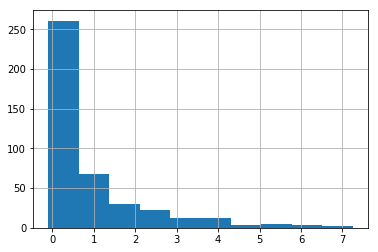

In [41]:
test['pred'].hist()

# Show best images

http://192.168.1.114:8888/files/diver_or_not/pics/2019-06-01T08:57:58.jpg


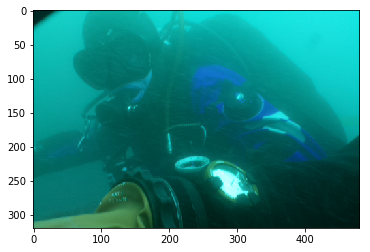

http://192.168.1.114:8888/files/diver_or_not/pics/2019-06-01T09:05:35.jpg


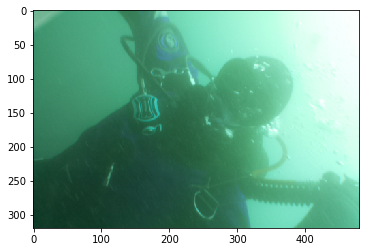

http://192.168.1.114:8888/files/diver_or_not/pics/2019-06-01T08:31:59.jpg


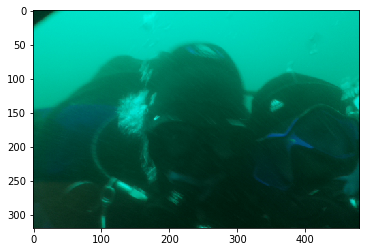

http://192.168.1.114:8888/files/diver_or_not/pics/2019-06-01T08:36:29.jpg


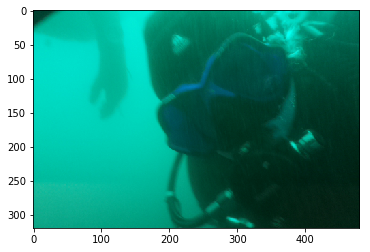

http://192.168.1.114:8888/files/diver_or_not/pics/2019-06-28T14:28:57.jpg


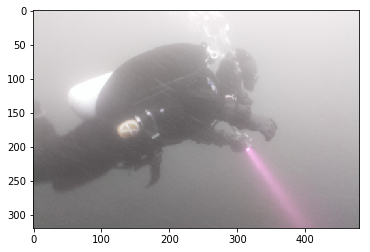

http://192.168.1.114:8888/files/diver_or_not/pics/2018-06-10T16-47-59.148996.jpg


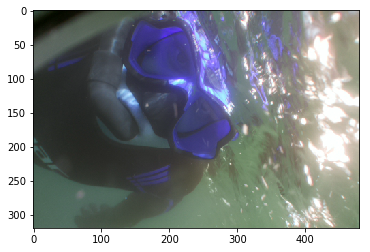

http://192.168.1.114:8888/files/diver_or_not/pics/2019-06-01T08:59:15.jpg


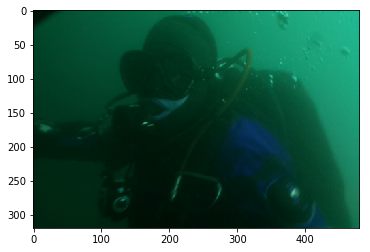

http://192.168.1.114:8888/files/diver_or_not/pics/2019-06-01T08:45:49.jpg


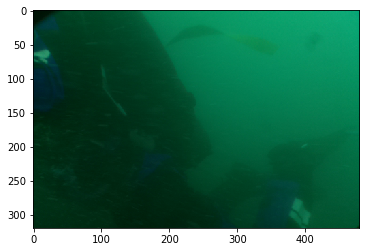

http://192.168.1.114:8888/files/diver_or_not/pics/2019-06-01T09:03:14.jpg


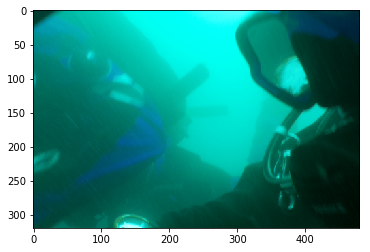

http://192.168.1.114:8888/files/diver_or_not/pics/2019-06-01T14:29:46.jpg


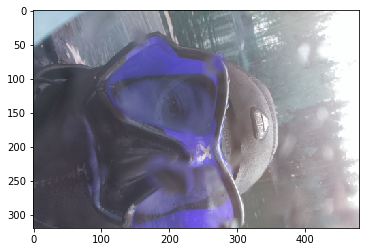

In [43]:
for filename in test.sort_values('pred', ascending=False).head(10)['file']:
    utils.show_image(filename)

http://192.168.1.114:8888/files/diver_or_not/pics/2019-06-28T14:39:20.jpg


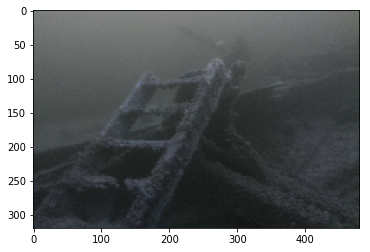

http://192.168.1.114:8888/files/diver_or_not/pics/2018-06-10T16-38-12.453476.jpg


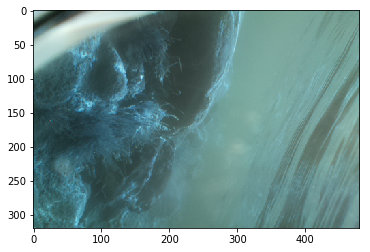

http://192.168.1.114:8888/files/diver_or_not/pics/2018-06-28T22-39-15.030135.jpg


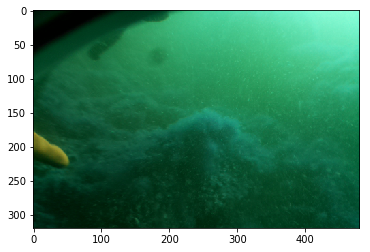

http://192.168.1.114:8888/files/diver_or_not/pics/2018-09-24T11-31-54.663526.jpg


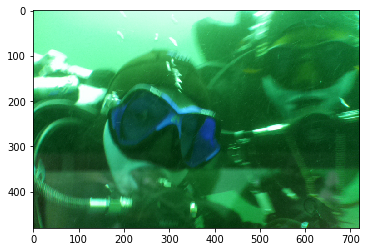

http://192.168.1.114:8888/files/diver_or_not/pics/2018-06-10T17-01-45.068646.jpg


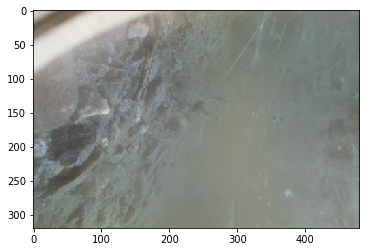

http://192.168.1.114:8888/files/diver_or_not/pics/2018-09-24T11-27-56.915444.jpg


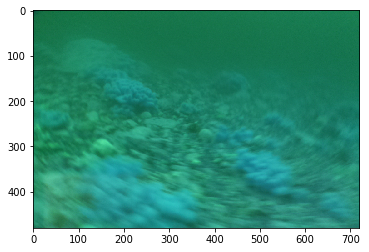

http://192.168.1.114:8888/files/diver_or_not/pics/2018-06-10T17-01-48.537866.jpg


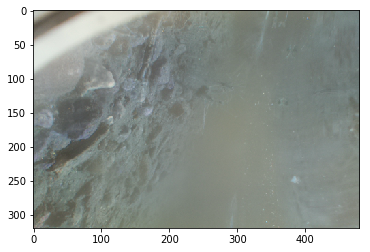

http://192.168.1.114:8888/files/diver_or_not/pics/2019-06-28T14:23:15.jpg


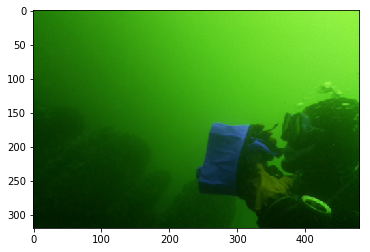

http://192.168.1.114:8888/files/diver_or_not/pics/2019-06-01T13:34:56.jpg


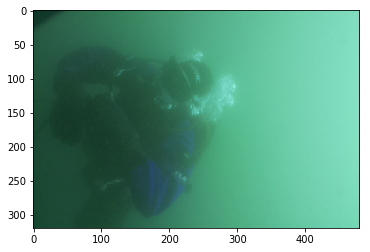

http://192.168.1.114:8888/files/diver_or_not/pics/2019-06-01T09:05:41.jpg


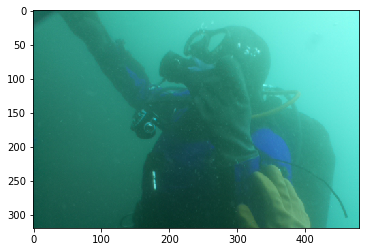

In [45]:
for filename in train.sort_values('pred', ascending=False).head(10)['file']:
    utils.show_image(filename)

In [46]:
import pickle

In [47]:
pickle.dump(model, open( "models/{}.p".format(model_name), "wb" ))

In [49]:
# plt.scatter(features, model.coef_[0])